In [3]:
import numpy, scipy, matplotlib
from pyscf import gto, scf, cc, mp, fci

def get_h4_fci_energy(a=1.0, b=1.0):
    h4 = gto.Mole()
    h4.atom = f'''
    H { a: 6.4f} { b: 6.4f} 0.0
    H {-a: 6.4f} { b: 6.4f} 0.0
    H { a: 6.4f} {-b: 6.4f} 0.0
    H {-a: 6.4f} {-b: 6.4f} 0.0
    '''
    h4.basis = '321g'
    h4.verbose = 0
    h4.build()

    mf = scf.RHF(h4)
    hcore = mf.get_hcore()
    ovlp  = mf.get_ovlp()
    mo_energy, mo_coeff = mf.eig(hcore, ovlp)

    fci_obj = fci.FCI(h4, mo_coeff, singlet=True)
    fci_obj.verbose = 0
    fci_obj.nroots  = 10
    e, c = fci_obj.kernel()
    
    fci_str_alph = fci.cistring._gen_occslst(range(4), 2)
    fci_str_beta = fci.cistring._gen_occslst(range(4), 2)
    
    for i, (ie, ic) in enumerate(zip(e, c)):
        print(f"FCI root {i:2d}: {ie: 16.12f}")
        for ia, alph in enumerate(fci_str_alph):
            for ib, beta in enumerate(fci_str_beta):
                if (ic[ia, ib]) ** 2 > 1e-1:
                    pass
                    print(f"    {alph} {beta}: {ic[ia, ib]: 16.12f}")
    return e

d = 0.0
get_h4_fci_energy(a=0.4+d, b=0.4-d)
# d_list = numpy.linspace(-0.2, 0.2, 21)
# fci_ene_list = []
# for d in d_list:
#     fci_ene_list.append(get_h4_fci_energy(a=0.4+d, b=0.4-d))

# fci_ene_list = numpy.array(fci_ene_list)

# from matplotlib import pyplot

# fig, ax = matplotlib.pyplot.subplots()
# ax.plot(d_list, fci_ene_list[:, 0], 'o-')
# ax.plot(d_list, fci_ene_list[:, 1], 'o-')
# ax.plot(d_list, fci_ene_list[:, 2], 'o-')
# ax.plot(d_list, fci_ene_list[:, 3], 'o-')
# ax.plot(d_list, fci_ene_list[:, 4], 'o-')

FCI root  0:  -1.900950675202
    [0 1] [0 1]:  -0.435491116571
    [0 1] [0 2]:   0.444012930659
    [0 2] [0 1]:   0.444012930659
    [0 2] [0 2]:   0.435491112013
FCI root  1:  -1.825367071325
    [0 1] [0 1]:   0.432401952987
    [0 1] [0 2]:   0.424102774393
    [0 2] [0 1]:   0.424102774393
    [0 2] [0 2]:  -0.432401955829
FCI root  2:  -1.823550919766
    [0 1] [0 1]:   0.603848406878
    [0 2] [0 2]:   0.603848382334
FCI root  3:  -1.381889569582
    [0 1] [0 3]:   0.596352305303
    [0 3] [0 1]:   0.596352305303
FCI root  4:  -1.381889569582
    [0 2] [0 3]:   0.596352305303
    [0 3] [0 2]:   0.596352305303
FCI root  5:  -1.192318477071
FCI root  6:  -1.192318477071
FCI root  7:  -1.117514380095
    [0 1] [1 2]:   0.547069214109
    [1 2] [0 1]:   0.547069214109
FCI root  8:  -1.117514380095
    [0 2] [1 2]:  -0.547069214109
    [1 2] [0 2]:  -0.547069214109
FCI root  9:  -1.074088290323
    [0 1] [2 3]:  -0.374410960902
    [0 2] [1 3]:   0.374404710990
    [1 2] [0 3]:  -0

array([-1.90095068, -1.82536707, -1.82355092, -1.38188957, -1.38188957,
       -1.19231848, -1.19231848, -1.11751438, -1.11751438, -1.07408829])

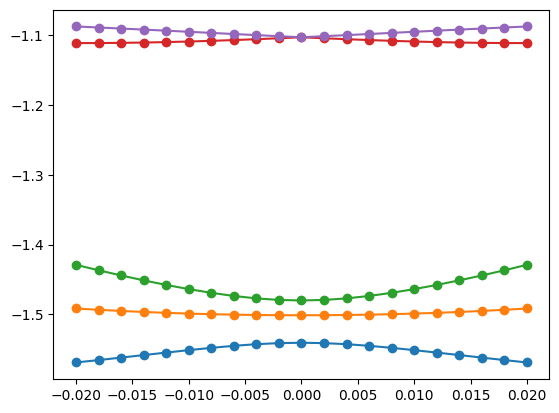

In [26]:
import numpy, scipy, matplotlib
from pyscf import gto, scf, cc, mp, fci

d_list = numpy.linspace(-0.02, 0.02, 21)
fci_ene_list = []
for d in d_list:
    fci_ene_list.append(get_h4_fci_energy(a=0.3+d, b=0.3-d))

fci_ene_list = numpy.array(fci_ene_list)

from matplotlib import pyplot

fig, ax = matplotlib.pyplot.subplots()
ax.plot(d_list, fci_ene_list[:, 0], 'o-')
ax.plot(d_list, fci_ene_list[:, 1], 'o-')
ax.plot(d_list, fci_ene_list[:, 2], 'o-')
ax.plot(d_list, fci_ene_list[:, 3], 'o-')
ax.plot(d_list, fci_ene_list[:, 4], 'o-')